In [2]:
from mpl_toolkits.basemap import Basemap
from scipy.stats import linregress
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import warnings

from scipy.stats.mstats import theilslopes
from scipy.stats import kendalltau, linregress
warnings.filterwarnings("ignore")
plt.rc('font',family='Arial') 

In [3]:
import os
os.chdir('/Users/yuanhe/Documents/icloud_share/13_machine_deep_learning/02_SDD结果汇总20210601/代码/GEE_out/Temporal_trend2')

In [4]:
df = pd.read_csv('/Users/yuanhe/Documents/icloud_share/13_machine_deep_learning/02_SDD结果汇总20210601/代码/GEE_out/Temporal_trend2/Trends_2014_to_2020_SDD_DGRN_no_greenland.csv')
lon = df['Long'].values
lat = df['Lat'].values
sdd_2014 = df['2014'].values
sdd_2015 = df['2015'].values
sdd_2016 = df['2016'].values
sdd_2017 = df['2017'].values
sdd_2018 = df['2018'].values
sdd_2019 = df['2019'].values
sdd_2020 = df['2020'].values
sen_slope = df['Sen_Slope'].values
mk_pvalue = df['MK_pvalue'].values
fid_lake = df.index.tolist()
lr_slope = df['Linear_Slope']
col = ['2014','2015','2016','2017','2018','2019','2020']
tem_sdd = df[col].values
df

,Unnamed: 0,Long,Lat,2014,2015,2016,2017,2018,2019,2020,Sen_Slope,MK_pvalue,Linear_Slope,LR_pvalue
0,0,-179.992498,65.362651,0.683711,0.459890,1.039041,1.382854,0.189562,0.527457,1.403530,0.091122,0.561905,0.051611,0.610010
1,1,-178.425781,65.552083,0.569378,1.002747,0.960457,0.819954,0.781811,0.524831,1.191238,-0.008909,1.000000,0.026111,0.609258
2,2,-178.303125,71.221818,1.178094,0.397837,1.061421,0.494957,0.737815,0.444027,1.032488,-0.024268,0.772619,-0.023859,0.735726
3,3,-175.750586,66.183018,2.920375,3.062839,3.316304,3.347129,2.958866,4.626698,2.572065,0.030825,0.772619,0.061620,0.663484
4,4,-175.639583,-15.610417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16470,16684,179.513897,71.317372,0.353078,0.379043,3.672513,0.626267,6.773536,0.646830,6.996854,0.831085,0.030159,0.841712,0.155636
16471,16685,179.561616,71.011534,0.954772,0.514056,1.212358,0.958560,2.900341,0.421745,1.336611,0.063640,0.561905,0.094603,0.593153
16472,16686,179.657728,65.609374,0.176610,0.733669,1.133879,0.737552,0.711697,0.737327,0.856543,0.025630,0.381349,0.058033,0.322449
16473,16687,179.777005,67.504004,4.088789,5.332888,3.690928,5.954984,5.944626,6.802094,6.554381,0.410932,0.069048,0.449603,0.025213


In [5]:
print(np.nanmean(sdd_2014))
print(np.nanmean(sdd_2015))
print(np.nanmean(sdd_2016))
print(np.nanmean(sdd_2017))
print(np.nanmean(sdd_2018))
print(np.nanmean(sdd_2019))
print(np.nanmean(sdd_2020))
print('STD')
print(np.nanstd(sdd_2014))
print(np.nanstd(sdd_2015))
print(np.nanstd(sdd_2016))
print(np.nanstd(sdd_2017))
print(np.nanstd(sdd_2018))
print(np.nanstd(sdd_2019))
print(np.nanstd(sdd_2020))

1.890088086730151
1.9210693688272438
1.9339144059913091
1.84412132101282
1.6372700784970577
1.8553555332573697
1.9140375064335347
STD
1.4051585504630544
1.4126385619960833
1.389343762772916
1.3939097935473603
1.3531123411965402
1.4163957636474938
1.4238416329783365


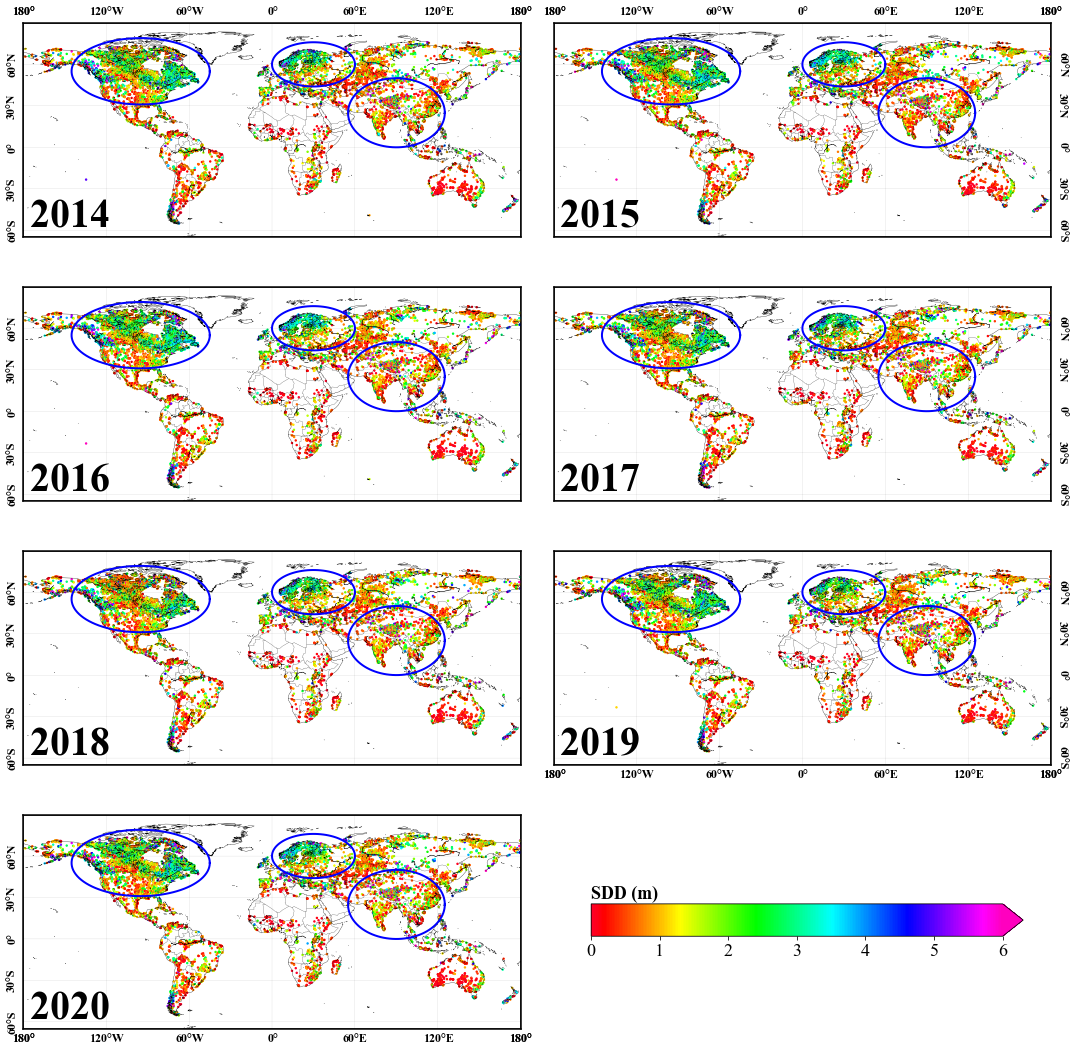

In [16]:
fig = plt.figure(figsize=(15,15))
my_cmap = 'gist_rainbow'
lines = 0.1
parallels = np.arange(-60,90,30)
meridians = np.arange(-180,179,60.)
an = np.linspace(0, 2 * np.pi, 100)

# 1
ax1 = fig.add_subplot(421)
ax1.text(-175,-58,'2014',fontsize=40,weight='bold')
eq_map = Basemap(resolution='c', urcrnrlat=90, llcrnrlat=-65, urcrnrlon=180, llcrnrlon=-180,
                 area_thresh=100, lat_0=0, lon_0=0)
x,y = eq_map(lon, lat)
eq_map.drawcoastlines(linewidth=0.3)
eq_map.drawcountries(linewidth=0.2)
eq_map.drawmapboundary(linewidth=1.5)
eq_map.scatter(x, y, c=sdd_2014, vmin=0, vmax=6, marker='o', s=2, cmap=my_cmap)
eq_map.drawparallels(parallels,labels=[True,False,False,False],fontsize=12,weight='bold',rotation=90,linewidth=lines)
eq_map.drawmeridians(meridians,labels=[False,False,True,False],fontsize=12,weight='bold',linewidth=lines)
eq_map.plot(50 * np.cos(an)-95, 24 * np.sin(an)+55, linewidth=2., c='blue')
eq_map.plot(30 * np.cos(an)+30, 16 * np.sin(an)+60, linewidth=2., c='blue')
eq_map.plot(35 * np.cos(an)+90, 25 * np.sin(an)+25, linewidth=2., c='blue')

# 2
ax2 = fig.add_subplot(422)
ax2.text(-175,-58,'2015',fontsize=40,weight='bold')
eq_map = Basemap(resolution='c', urcrnrlat=90, llcrnrlat=-65, urcrnrlon=180, llcrnrlon=-180,
                 area_thresh=100, lat_0=0, lon_0=0)
eq_map.drawcoastlines(linewidth=0.3)
eq_map.drawcountries(linewidth=0.2)
eq_map.drawmapboundary(linewidth=1.5)
# my_cmap = colors.LinearSegmentedColormap.reversed(plt.cm.jet)
eq_map.scatter(x, y, c=sdd_2015, vmin=0, vmax=6, marker='o', s=2, cmap=my_cmap)
eq_map.drawparallels(parallels,labels=[False,True,False,False],fontsize=12,weight='bold',rotation=270,linewidth=lines)
eq_map.drawmeridians(meridians,labels=[False,False,True,False],fontsize=12,weight='bold',linewidth=lines)
eq_map.plot(50 * np.cos(an)-95, 24 * np.sin(an)+55, linewidth=2., c='blue')
eq_map.plot(30 * np.cos(an)+30, 16 * np.sin(an)+60, linewidth=2., c='blue')
eq_map.plot(35 * np.cos(an)+90, 25 * np.sin(an)+25, linewidth=2., c='blue')

# 3
ax3 = fig.add_subplot(423)
ax3.text(-175,-58,'2016',fontsize=40,weight='bold')
eq_map = Basemap(resolution='c', urcrnrlat=90, llcrnrlat=-65, urcrnrlon=180, llcrnrlon=-180,
                 area_thresh=100, lat_0=0, lon_0=0)
eq_map.drawcoastlines(linewidth=0.3)
eq_map.drawcountries(linewidth=0.2)
eq_map.drawmapboundary(linewidth=1.5)
eq_map.scatter(x, y, c=sdd_2016, vmin=0, vmax=6, marker='o', s=2, cmap=my_cmap)
eq_map.drawparallels(parallels,labels=[True,False,False,False],fontsize=12,weight='bold',rotation=90,linewidth=lines)
eq_map.drawmeridians(meridians,labels=[False,False,False,False],fontsize=12,weight='bold',linewidth=lines)
eq_map.plot(50 * np.cos(an)-95, 24 * np.sin(an)+55, linewidth=2., c='blue')
eq_map.plot(30 * np.cos(an)+30, 16 * np.sin(an)+60, linewidth=2., c='blue')
eq_map.plot(35 * np.cos(an)+90, 25 * np.sin(an)+25, linewidth=2., c='blue')

# 4
ax4 = fig.add_subplot(424)
ax4.text(-175,-58,'2017',fontsize=40,weight='bold')
eq_map = Basemap(resolution='c', urcrnrlat=90, llcrnrlat=-65, urcrnrlon=180, llcrnrlon=-180,
                 area_thresh=100, lat_0=0, lon_0=0)
eq_map.drawcoastlines(linewidth=0.3)
eq_map.drawcountries(linewidth=0.2)
eq_map.drawmapboundary(linewidth=1.5)
eq_map.scatter(x, y, c=sdd_2017, vmin=0, vmax=6, marker='o', s=2, cmap=my_cmap)
eq_map.drawparallels(parallels,labels=[False,True,False,False],fontsize=12,weight='bold',rotation=270,linewidth=lines)
eq_map.drawmeridians(meridians,labels=[False,False,False,False],fontsize=12,weight='bold',linewidth=lines)
eq_map.plot(50 * np.cos(an)-95, 24 * np.sin(an)+55, linewidth=2., c='blue')
eq_map.plot(30 * np.cos(an)+30, 16 * np.sin(an)+60, linewidth=2., c='blue')
eq_map.plot(35 * np.cos(an)+90, 25 * np.sin(an)+25, linewidth=2., c='blue')

# 5
ax5 = fig.add_subplot(425)
ax5.text(-175,-58,'2018',fontsize=40,weight='bold')
eq_map = Basemap(resolution='c', urcrnrlat=90, llcrnrlat=-65, urcrnrlon=180, llcrnrlon=-180,
                 area_thresh=100, lat_0=0, lon_0=0)
eq_map.drawcoastlines(linewidth=0.3)
eq_map.drawcountries(linewidth=0.2)
eq_map.drawmapboundary(linewidth=1.5)
eq_map.scatter(x, y, c=sdd_2018, vmin=0, vmax=6, marker='o', s=2, cmap=my_cmap)
eq_map.drawparallels(parallels,labels=[True,False,False,False],fontsize=12,weight='bold',rotation=90,linewidth=lines)
eq_map.drawmeridians(meridians,labels=[False,False,False,False],fontsize=12,weight='bold',linewidth=lines)
eq_map.plot(50 * np.cos(an)-95, 24 * np.sin(an)+55, linewidth=2., c='blue')
eq_map.plot(30 * np.cos(an)+30, 16 * np.sin(an)+60, linewidth=2., c='blue')
eq_map.plot(35 * np.cos(an)+90, 25 * np.sin(an)+25, linewidth=2., c='blue')

# 6
ax6 = fig.add_subplot(426)
ax6.text(-175,-58,'2019',fontsize=40,weight='bold')
eq_map = Basemap(resolution='c', urcrnrlat=90, llcrnrlat=-65, urcrnrlon=180, llcrnrlon=-180,
                 area_thresh=100, lat_0=0, lon_0=0)
eq_map.drawcoastlines(linewidth=0.3)
eq_map.drawcountries(linewidth=0.2)
eq_map.drawmapboundary(linewidth=1.5)
eq_map.scatter(x, y, c=sdd_2019, vmin=0, vmax=6, marker='o', s=2, cmap=my_cmap)
eq_map.drawparallels(parallels,labels=[False,True,False,False],fontsize=12,weight='bold',rotation=270,linewidth=lines)
eq_map.drawmeridians(meridians,labels=[False,False,False,True],fontsize=12,weight='bold',linewidth=lines)
eq_map.plot(50 * np.cos(an)-95, 24 * np.sin(an)+55, linewidth=2., c='blue')
eq_map.plot(30 * np.cos(an)+30, 16 * np.sin(an)+60, linewidth=2., c='blue')
eq_map.plot(35 * np.cos(an)+90, 25 * np.sin(an)+25, linewidth=2., c='blue')

# 7
ax7 = fig.add_subplot(427)
ax7.text(-175,-58,'2020',fontsize=40,weight='bold')
eq_map = Basemap(resolution='c', urcrnrlat=90, llcrnrlat=-65, urcrnrlon=180, llcrnrlon=-180,
                 area_thresh=100, lat_0=0, lon_0=0)
eq_map.drawcoastlines(linewidth=0.3)
eq_map.drawcountries(linewidth=0.2)
eq_map.drawmapboundary(linewidth=1.5)
cm_able = eq_map.scatter(x, y, c=sdd_2020, vmin=0, vmax=6, marker='o', s=2, cmap=my_cmap)
eq_map.drawparallels(parallels,labels=[True,False,False,False],fontsize=12,weight='bold',rotation=90,linewidth=lines)
eq_map.drawmeridians(meridians,labels=[False,False,False,True],fontsize=12,weight='bold',linewidth=lines)
eq_map.plot(50 * np.cos(an)-95, 24 * np.sin(an)+55, linewidth=2., c='blue')
eq_map.plot(30 * np.cos(an)+30, 16 * np.sin(an)+60, linewidth=2., c='blue')
eq_map.plot(35 * np.cos(an)+90, 25 * np.sin(an)+25, linewidth=2., c='blue')

plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0,hspace=0.15)
plt.tight_layout()

position=fig.add_axes([0.55, 0.12, 0.4, 0.03])#位置[左,下,右,上]
cb = fig.colorbar(cm_able, fraction=0.03, ax=[ax1,ax2,ax3,ax4,ax5,ax6,ax7],#location='bottom'
             cax=position, extend='max',ticks=[0,1,2,3,4,5,6,7],pad=0.04,orientation='horizontal')
cb.ax.set_title('SDD (m)', fontsize=18, weight='bold',loc='left')
cb.ax.tick_params(labelsize=18)

# plt.savefig('./Fig7.png',dpi=1000, bbox_inches='tight')

In [17]:
interval = 1
# Lon
x_lon = lon
list_lon = np.arange(int(np.min(x_lon)),int(np.max(x_lon))+1,interval)
average_lon_incre = np.zeros_like(list_lon)
average_lon_decre = np.zeros_like(list_lon)

n = 0
print('************ LON ************')
for lon1 in range(int(np.min(x_lon)),int(np.max(x_lon))+1,interval):
    save_space_incre = 0
    save_space_decre = 0
    save_lon = []
    for i in range(x_lon.shape[0]):
        if lon1 <= x_lon[i] < lon1+interval:
            if sen_slope[i] > 0:
                save_space_incre += 1
            else:
                save_space_decre += 1
        else:
            pass
    average_lon_incre[n] = save_space_incre
    average_lon_decre[n] = save_space_decre
    n += 1
del save_space_incre, save_space_decre

# Lon
x_lat = lat
list_lat = np.arange(int(np.min(x_lat)),int(np.max(x_lat))+1,interval)

average_lat_incre = np.zeros_like(list_lat)
average_lat_decre = np.zeros_like(list_lat)
n = 0
print('************ LAT ************')
for lat1 in range(int(np.min(x_lat)),int(np.max(x_lat))+1,interval):
    save_space_incre = 0
    save_space_decre = 0
    save_lat = []
    for i in range(x_lon.shape[0]):
        if lat1 <= x_lat[i] < lat1+interval:
            if sen_slope[i] > 0:
                save_space_incre += 1
            else:
                save_space_decre += 1
        else:
            pass
    average_lat_incre[n] = save_space_incre
    average_lat_decre[n] = save_space_decre
    n += 1
del save_space_incre, save_space_decre

************ LON ************
************ LAT ************


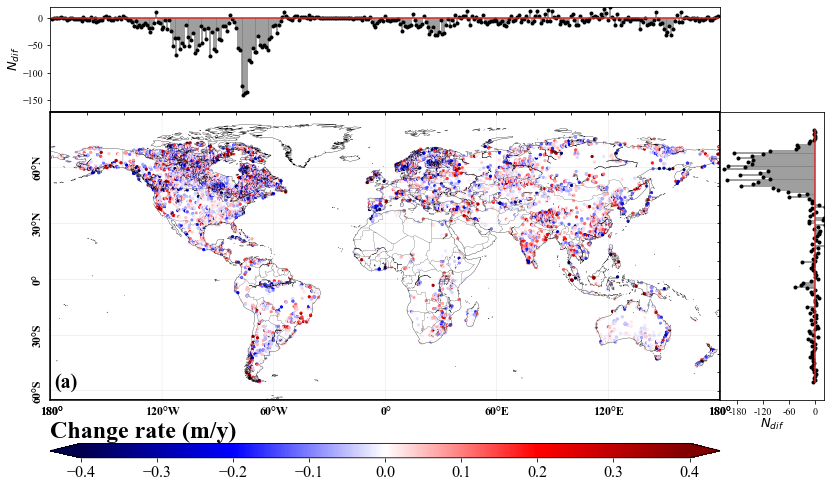

In [18]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    ax_histx1.tick_params(axis="x", labelbottom=False)
    
    markerline, stemlines, baseline = ax_histx1.stem(list_lon, average_lon_incre-average_lon_decre, linefmt='grey', markerfmt='.')
    plt.setp(markerline, color='k')
    ax_histx1.set_xlim([-180,180])
    ax_histx1.set_xticks([-180,-160,-140,-120,-100,-80,-60,-40,-20,0,20,40,60,80,100,120,140,160,180])
    ax_histx1.set_xticklabels([-180,-160,-140,-120,-100,-80,-60,-40,-20,0,20,40,60,80,100,120,140,160,180])
    ax_histx1.set_ylim([-170,20])
    ax_histx1.set_ylabel('$N_{dif}$',fontsize=13,labelpad=0.05)
    
    ax_histy1.tick_params(axis="y", labelleft=False)
    markerline, stemlines, baseline = ax_histy1.stem(list_lat, average_lat_incre-average_lat_decre, linefmt='grey', markerfmt='.', orientation='horizontal')
    plt.setp(markerline, color='k')
    ax_histy1.set_ylim([-65,90])
    ax_histy1.set_yticks([-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80])
    ax_histy1.set_yticklabels([-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80])
    ax_histy1.set_xticks(np.arange(-180,1,60))
    ax_histy1.set_xticklabels(np.arange(-180,1,60))
    ax_histy1.set_xlim([-220,20])
    ax_histy1.set_xlabel('$N_{dif}$',fontsize=13,labelpad=0)
    
rect_histx1 = [0.1245, 0.704, 0.775, 0.12]
rect_histy1 = [0.9, 0.369, 0.12, 0.334]
fig = plt.figure(figsize=(12, 12))

trend_map = Basemap(resolution='c', urcrnrlat=90, llcrnrlat=-65, urcrnrlon=180, llcrnrlon=-180,
                 area_thresh=100, lat_0=0, lon_0=0)
x,y = trend_map(lon, lat)
trend_map.drawcoastlines(linewidth=0.3)
trend_map.drawcountries(linewidth=0.2)
trend_map.drawmapboundary(linewidth=1.5)
trend_map.scatter(x, y, c=sen_slope, marker='o', s=5, vmin=-0.4, vmax=0.4, cmap='seismic',alpha=1)
lines = 0.1
parallels = np.arange(-60,90,30)
meridians = np.arange(-180,121,60.)
trend_map.drawparallels(parallels,labels=[True,False,False,False],fontsize=12,weight='bold',rotation=90,linewidth=lines)
trend_map.drawmeridians(meridians,labels=[False,False,False,True],fontsize=12,weight='bold',linewidth=lines)
cb = trend_map.colorbar(location='bottom',extend='both',pad=0.6)
cb.ax.tick_params(labelsize=16)

ax_histx1 = fig.add_axes(rect_histx1)
ax_histy1 = fig.add_axes(rect_histy1)
# use the previously defined function
plt.text(-1760,-58,'(a)',weight='bold',fontsize=20)
cb.ax.set_title('Change rate (m/y)', fontsize=24, weight='bold',loc='left')
scatter_hist(lat, lon, trend_map, ax_histx1, ax_histy1)
# plt.savefig('./Fig8a.png',dpi=1000, bbox_inches='tight')

In [19]:
col0 = ['2014','2015','2016','2017','2018','2019']
col1 = ['2014','2015','2016','2017','2018','2019','2020']

China_points = pd.read_csv('/Users/yuanhe/Documents/icloud_share/13_machine_deep_learning/02_SDD结果汇总20210601/代码/GEE_out/Temporal_trend2/China_points.csv')
China_19_20 = 100*(China_points['2020']-China_points['2019'])/np.nanmean(China_points[['2019','2020']],1)
China_19_pre = 100*(China_points['2020']-np.nanmean(China_points[col0],1))/np.nanmean(China_points[col1],1)
China_lat = China_points['Lat']
China_lon = China_points['Long']

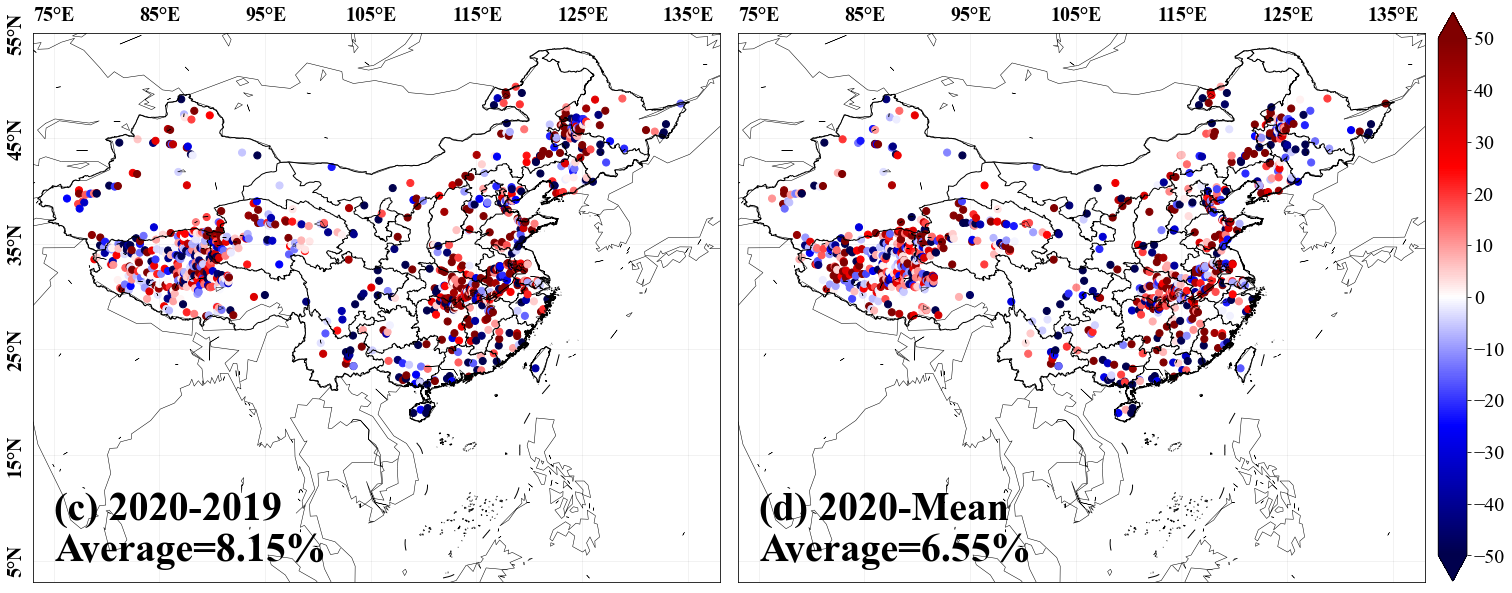

In [24]:
paral = np.arange(5,56,10)
meril = np.arange(75,136,10)
lines = 0.1

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
China_map = Basemap(resolution='c', urcrnrlat=55, llcrnrlat=3, urcrnrlon=138, llcrnrlon=73,
                 area_thresh=100, lat_0=0, lon_0=0)
cx,cy = China_map(China_lon, China_lat)
China_map.drawcountries(linewidth=0.5)
China_map.drawcoastlines(linewidth=0.5)
China_map.readshapefile('/Users/yuanhe/Documents/icloud_share/12_收集/学业/南海诸岛/nanhai','China','drawbounds=True',linewidth=1)
China_map.scatter(cx, cy, c=China_19_20, vmin=-50, vmax=50, marker='o', s=50, cmap='seismic')
China_map.drawparallels(paral,labels=[True,False,False,False],fontsize=20,weight='bold',rotation=90,linewidth=lines)
China_map.drawmeridians(meril,labels=[False,False,True,False],fontsize=20,weight='bold',linewidth=lines)
ax1.text(75,5,'(c) 2020-2019\nAverage=%.2f'%(np.nanmean(China_19_20))+'%',fontsize=40, weight='bold')

ax2 = fig.add_subplot(122)
China_map = Basemap(resolution='c', urcrnrlat=55, llcrnrlat=3, urcrnrlon=138, llcrnrlon=73,
                 area_thresh=100, lat_0=0, lon_0=0)
China_map.readshapefile('/Users/yuanhe/Documents/icloud_share/12_收集/学业/南海诸岛/nanhai','China','drawbounds=True',linewidth=1)
cm_able = China_map.scatter(cx, cy, c=China_19_pre, vmin=-50, vmax=50, marker='o', s=50, cmap='seismic')
China_map.drawcountries(linewidth=0.5)
China_map.drawcoastlines(linewidth=0.5)
China_map.drawparallels(paral,labels=[False,False,False,False],fontsize=20,weight='bold',rotation=90,linewidth=lines)
China_map.drawmeridians(meril,labels=[False,False,True,False],fontsize=20,weight='bold',linewidth=lines)

position=fig.add_axes([1, 0.12, 0.02, 0.79])
cb = fig.colorbar(cm_able, fraction=0.03, ax=[ax1,ax2,ax3,ax4,ax5,ax6,ax7],#location='bottom'
             cax=position, extend='both',ticks=[-50,-40,-30,-20,-10,0,10,20,30,40,50],pad=0.04)
ax2.text(75,5,'(d) 2020-Mean\nAverage=%.2f'%(np.nanmean(China_19_pre))+'%',fontsize=40, weight='bold')
cb.ax.tick_params(labelsize=20)
plt.tight_layout()
# plt.savefig('./Fig11cd.png',dpi=1000, bbox_inches='tight')

In [26]:
# Lon
x_lon = lon
average_lon = np.zeros(shape=(int(np.max(x_lon))+1-int(np.min(x_lon))),)
sdd_dgrn_lon = (sdd_2020-sdd_2019)/np.nanmean(tem_sdd[:,5:7],1)*100

list_lon = np.arange(int(np.min(x_lon)),int(np.max(x_lon))+1)
average_lon = np.zeros(shape=(int(np.max(x_lon))+1-int(np.min(x_lon))),)
n = 0
print('************ LON ************')
for lon1 in range(int(np.min(x_lon)),int(np.max(x_lon))+1):
    save_space = []
    save_lon = []
    for i in range(x_lon.shape[0]):
        if lon1 <= x_lon[i] < lon1+1:
            save_space.append(sdd_dgrn_lon[i])
            save_lon.append(round(x_lon[i],0))
        else:
            pass
    average_lon[n] = np.nanmean(np.array(save_space))
    n += 1
del save_space
# Lat
x_lat = lat
average_lat = np.zeros(shape=(int(np.max(x_lat))+1-int(np.min(x_lat))),)
sdd_dgrn_lat = (sdd_2020-sdd_2019)/np.nanmean(tem_sdd[:,5:7],1)*100
list_lat = np.arange(int(np.min(x_lat)),int(np.max(x_lat))+1)
average_lat = np.zeros(shape=(int(np.max(x_lat))+1-int(np.min(x_lat))),)
m = 0
print('************ LAT ************')
for lat1 in range(int(np.min(x_lat)),int(np.max(x_lat))+1):
    save_space = []
    save_lat = []
    for i in range(x_lat.shape[0]):
        if lat1 <= x_lat[i] < lat1+1:
            save_space.append(sdd_dgrn_lat[i])
            save_lat.append(round(x_lat[i],0))
        else:
            pass
    average_lat[m] = np.nanmean(np.array(save_space))
    m += 1
del save_space

list_lat = np.arange(int(np.min(x_lat)),int(np.max(x_lat))+1)
list_lon = np.arange(int(np.min(x_lon)),int(np.max(x_lon))+1)

************ LON ************
************ LAT ************


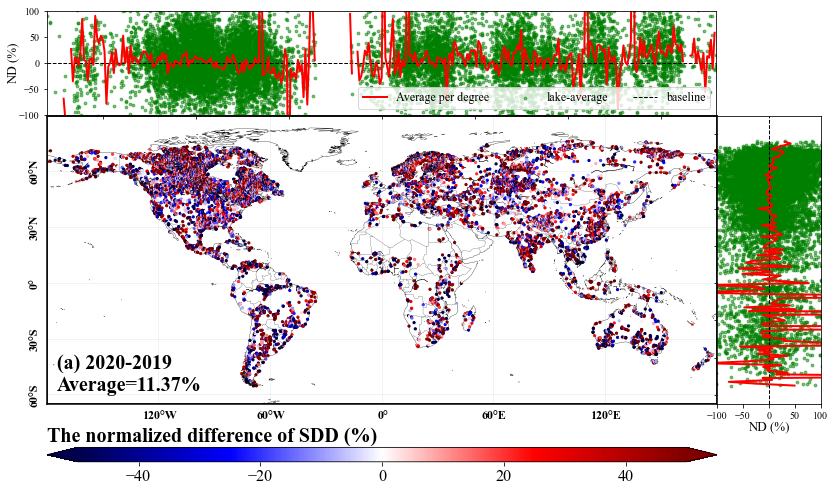

In [27]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx1.tick_params(axis="x", labelbottom=False)
    ax_histy1.tick_params(axis="y", labelleft=False)

    ax_histx1.plot(list_lon, average_lon,'r',linewidth=2, label='Average per degree')
    ax_histx1.scatter(x_lon, sdd_dgrn_lon, c='green', s=8, alpha=0.5, label='lake-average')
    ax_histx1.hlines(0,-180,180, linestyles='dashed', colors='black', linewidth=1, label='baseline')
    ax_histx1.set_xlim([-180,180])
    ax_histx1.set_ylim([-100,100])
    ax_histx1.set_ylabel('ND (%)',fontsize=13,labelpad=0.05)
    ax_histx1.legend(loc='best', fontsize=12, ncol=3)
    
    ax_histy1.plot(average_lat,list_lat, 'r',linewidth=2, label='Average per degree')
    ax_histy1.scatter(sdd_dgrn_lat, x_lat, c='green', s=8, alpha=0.5, label='lake-average')
    ax_histy1.vlines(0,-65,90, linestyles='dashed', colors='black', linewidth=1, label='baseline')
    ax_histy1.set_xlim([-100,100])
    ax_histy1.set_ylim([-65,90])
    ax_histy1.set_xticks(np.arange(-100,100.1,50))
    ax_histy1.set_xlabel('ND (%)',fontsize=13,labelpad=0.05)

lines = 0.1
rect_histx1 = [0.1245, 0.704, 0.775, 0.12]
rect_histy1 = [0.9, 0.369, 0.12, 0.334]
fig = plt.figure(figsize=(12, 12))

x,y = eq_map(lon, lat)
# ax1.text(-175,-58,'(a) 2020-2019\nAverage=%.2f m'%(np.nanmean(sdd_2020-sdd_2019)),fontsize=28,weight='bold')
dif_map = Basemap(resolution='c', urcrnrlat=90, llcrnrlat=-65, urcrnrlon=180, llcrnrlon=-180,
                 area_thresh=100, lat_0=0, lon_0=0)
dif_map.drawcoastlines(linewidth=0.3)
dif_map.drawcountries(linewidth=0.2)
dif_map.drawmapboundary(linewidth=1.5)
dif_map.scatter(x, y, c=sdd_dgrn_lon, vmin=-50, vmax=50, marker='o', s=5, cmap='seismic')
lines = 0.1
parallels = np.arange(-60,90,30)
meridians = np.arange(-120,121,60.)
dif_map.drawparallels(parallels,labels=[True,False,False,False],fontsize=12,weight='bold',rotation=90,linewidth=lines)
dif_map.drawmeridians(meridians,labels=[False,False,False,True],fontsize=12,weight='bold',linewidth=lines)
plt.text(-175,-58,'(a) 2020-2019\nAverage=%.2f'%(np.nanmean(sdd_dgrn_lon))+'%',fontsize=20,weight='bold')
cb = dif_map.colorbar(location='bottom',extend='both',pad=0.6)
cb.ax.tick_params(labelsize=16)
cb.ax.set_title('The normalized difference of SDD (%) ', fontsize=20, weight='bold',loc='left')
ax_histx1 = fig.add_axes(rect_histx1)
ax_histy1 = fig.add_axes(rect_histy1)
scatter_hist(lat, lon, dif_map, ax_histx1, ax_histy1)
# plt.savefig('./Fig11a.png',dpi=1000, bbox_inches='tight')

In [28]:
# Lon
lines = 0.1
mid = ['2014','2015','2016','2017','2018','2019']
x_lon = lon
average_lon = np.zeros(shape=(int(np.max(x_lon))+1-int(np.min(x_lon))),)
sdd_dgrn_lon = (sdd_2020-np.nanmean(df[mid].values,1))/np.nanmean(tem_sdd,1)*100

list_lon = np.arange(int(np.min(x_lon)),int(np.max(x_lon))+1)
average_lon = np.zeros(shape=(int(np.max(x_lon))+1-int(np.min(x_lon))),)
n = 0
print('************ LON ************')
for lon1 in range(int(np.min(x_lon)),int(np.max(x_lon))+1):
    save_space = []
    save_lon = []
    for i in range(x_lon.shape[0]):
        if lon1 <= x_lon[i] < lon1+1:
            save_space.append(sdd_dgrn_lon[i])
            save_lon.append(round(x_lon[i],0))
        else:
            pass
    average_lon[n] = np.nanmean(np.array(save_space))
    n += 1
del save_space
# Lat
x_lat = lat
average_lat = np.zeros(shape=(int(np.max(x_lat))+1-int(np.min(x_lat))),)
sdd_dgrn_lat = (sdd_2020-np.nanmean(df[mid].values,1))/np.nanmean(tem_sdd,1)*100
list_lat = np.arange(int(np.min(x_lat)),int(np.max(x_lat))+1)
average_lat = np.zeros(shape=(int(np.max(x_lat))+1-int(np.min(x_lat))),)
m = 0
print('************ LAT ************')
for lat1 in range(int(np.min(x_lat)),int(np.max(x_lat))+1):
    save_space = []
    save_lat = []
    for i in range(x_lat.shape[0]):
        if lat1 <= x_lat[i] < lat1+1:
            save_space.append(sdd_dgrn_lat[i])
            save_lat.append(round(x_lat[i],0))
        else:
            pass
    average_lat[m] = np.nanmean(np.array(save_space))
    m += 1
del save_space

list_lat = np.arange(int(np.min(x_lat)),int(np.max(x_lat))+1)
list_lon = np.arange(int(np.min(x_lon)),int(np.max(x_lon))+1)

************ LON ************
************ LAT ************


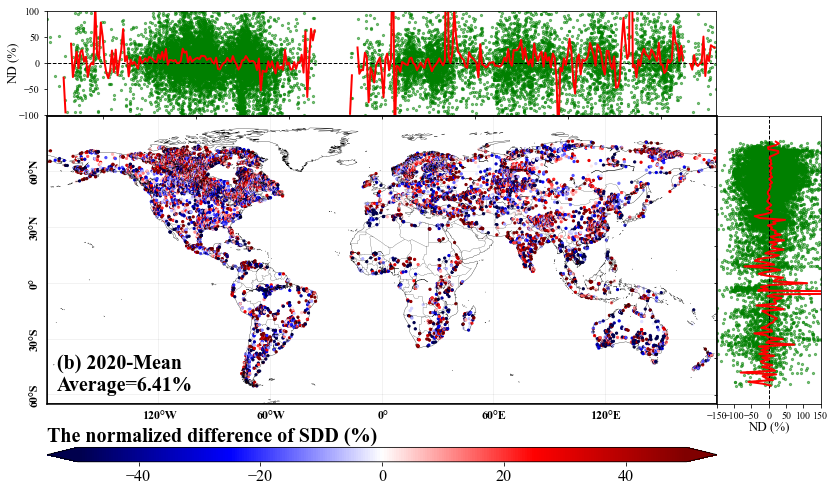

In [29]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx1.tick_params(axis="x", labelbottom=False)
    ax_histy1.tick_params(axis="y", labelleft=False)
    
    ax_histx1.plot(list_lon, average_lon,'r',linewidth=2, label='Average per degree')
    ax_histx1.scatter(x_lon, sdd_dgrn_lon, c='green', s=5, alpha=0.5, label='lake-average')
    ax_histx1.hlines(0,-180,180, linestyles='dashed', colors='black', linewidth=1, label='baseline')
    ax_histx1.set_xlim([-180,180])
    ax_histx1.set_ylim([-100,100])
    ax_histx1.set_ylabel('ND (%)',fontsize=13,labelpad=0.05)
    
    ax_histy1.plot(average_lat,list_lat, 'r',linewidth=2, label='Average per degree')
    ax_histy1.scatter(sdd_dgrn_lat, x_lat, c='green', s=5, alpha=0.5, label='lake-average')
    ax_histy1.vlines(0,-65,90, linestyles='dashed', colors='black', linewidth=1, label='baseline')
    ax_histy1.set_xlim([-100,100])
    ax_histy1.set_ylim([-65,90])
    ax_histy1.set_xticks(np.arange(-150,150.1,50))
    ax_histy1.set_xlabel('ND (%)',fontsize=13,labelpad=0.05)
    
rect_histx1 = [0.1245, 0.704, 0.775, 0.12]
rect_histy1 = [0.9, 0.369, 0.12, 0.334]
fig = plt.figure(figsize=(12, 12))

x,y = eq_map(lon, lat)
dif_map = Basemap(resolution='c', urcrnrlat=90, llcrnrlat=-65, urcrnrlon=180, llcrnrlon=-180,
                 area_thresh=100, lat_0=0, lon_0=0)
dif_map.drawcoastlines(linewidth=0.3)
dif_map.drawcountries(linewidth=0.2)
dif_map.drawmapboundary(linewidth=1.5)
dif_map.scatter(x, y, c=sdd_dgrn_lon, vmin=-50, vmax=50, marker='o', s=5, cmap='seismic')
dif_map.drawparallels(parallels,labels=[True,False,False,False],fontsize=12,weight='bold',rotation=90,linewidth=lines)
dif_map.drawmeridians(meridians,labels=[False,False,False,True],fontsize=12,weight='bold',linewidth=lines)
plt.text(-175,-58,'(b) 2020-Mean\nAverage=%.2f'%(np.nanmean(sdd_dgrn_lon))+'%',fontsize=20,weight='bold')
cb = dif_map.colorbar(location='bottom',extend='both',pad=0.6)
cb.ax.tick_params(labelsize=16)

ax_histx1 = fig.add_axes(rect_histx1)
ax_histy1 = fig.add_axes(rect_histy1)
cb.ax.set_title('The normalized difference of SDD (%)', fontsize=20, weight='bold',loc='left')
scatter_hist(lat, lon, dif_map, ax_histx1, ax_histy1)
# plt.savefig('./Fig11b.png',dpi=1000, bbox_inches='tight')

In [32]:
sig_incre_lat = []
sig_decre_lat = []
unsig_tre_lat = []

sig_incre_lon = []
sig_decre_lon = []
unsig_tre_lon = []

fid_incre = []
fid_decre = []
fid_unsig = []

for i in range(mk_pvalue.shape[0]):
    if mk_pvalue[i] < 0.05:
        if sen_slope[i] > 0:
            sig_incre_lat.append(lat[i])
            sig_incre_lon.append(lon[i])
            fid_incre.append(fid_lake[i])
        elif sen_slope[i] < 0:
            sig_decre_lat.append(lat[i])
            sig_decre_lon.append(lon[i])
            fid_decre.append(fid_lake[i])
    else:
        unsig_tre_lat.append(lat[i])
        unsig_tre_lon.append(lon[i])
        fid_unsig.append(fid_lake[i])
del i
print('Increase:'+str(len(sig_incre_lat)))
print('Decrease:'+str(len(sig_decre_lat)))
print('Unsignificant samples:'+str(len(unsig_tre_lat)))

Increase:243
Decrease:392
Unsignificant samples:15840


In [30]:
interval = 1
# Lon
x_lon = lon
list_lon = np.arange(int(np.min(x_lon)),int(np.max(x_lon))+1, interval)
average_lon_incre = np.zeros_like(list_lon)
average_lon_decre = np.zeros_like(list_lon)
n = 0
print('************ LON ************')
for lon1 in range(int(np.min(x_lon)),int(np.max(x_lon))+1,interval):
    save_space_incre = 0
    save_space_decre = 0
    save_lon = []
    for i in range(x_lon.shape[0]):
        if lon1 <= x_lon[i] < lon1+interval:
            if mk_pvalue[i] < 0.05:
                if sen_slope[i] > 0:
                    save_space_incre += 1
                else:
                    save_space_decre += 1
        else:
            pass
    average_lon_incre[n] = save_space_incre
    average_lon_decre[n] = save_space_decre
    n += 1
del save_space_incre, save_space_decre

# Lon
x_lat = lat
list_lat = np.arange(int(np.min(x_lat)),int(np.max(x_lat))+1, interval)
average_lat_incre = np.zeros_like(list_lat)
average_lat_decre = np.zeros_like(list_lat)
n = 0
print('************ LAT ************')
for lat1 in range(int(np.min(x_lat)),int(np.max(x_lat))+1,interval):
    save_space_incre = 0
    save_space_decre = 0
    save_lat = []
    for i in range(x_lon.shape[0]):
        if lat1 <= x_lat[i] < lat1+interval:
            if mk_pvalue[i] < 0.05:
                if sen_slope[i] > 0:
                    save_space_incre += 1
                else:
                    save_space_decre += 1
        else:
            pass
    average_lat_incre[n] = save_space_incre
    average_lat_decre[n] = save_space_decre
    n += 1
del save_space_incre, save_space_decre

************ LON ************
************ LAT ************


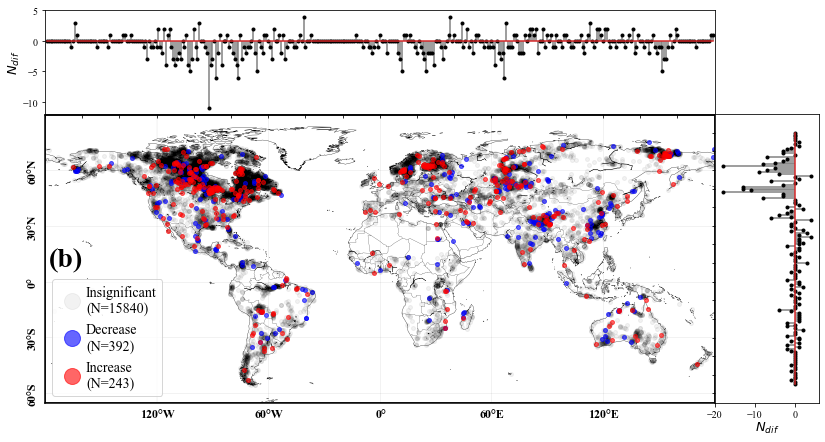

In [34]:
parallels = np.arange(-60,90,30)
meridians = np.arange(-120,121,60.)
lines = 0.1
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx1.tick_params(axis="x", labelbottom=False)
    ax_histy1.tick_params(axis="y", labelleft=False)
    
    markerline, stemlines, baseline = ax_histx1.stem(list_lon, average_lon_incre-average_lon_decre, linefmt='grey', markerfmt='.')
    plt.setp(markerline, color='k')
    ax_histx1.set_xlim([-180,180])
    ax_histx1.set_xticks([-180,-160,-140,-120,-100,-80,-60,-40,-20,0,20,40,60,80,100,120,140,160,180])
    ax_histx1.set_xticklabels([-180,-160,-140,-120,-100,-80,-60,-40,-20,0,20,40,60,80,100,120,140,160,180])
    ax_histx1.set_ylim([-12,5])
    ax_histx1.set_ylabel('$N_{dif}$',fontsize=13,labelpad=0.05)
    
    markerline, stemlines, baseline = ax_histy1.stem(list_lat, average_lat_incre-average_lat_decre, linefmt='grey', markerfmt='.', orientation='horizontal')
    plt.setp(markerline, color='k')
    ax_histy1.set_ylim([-65,90])
    ax_histy1.set_yticks([-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80])
    ax_histy1.set_yticklabels([-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80])
    ax_histy1.set_xlim([-20,6])
    ax_histy1.set_xlabel('$N_{dif}$',fontsize=13,labelpad=0)
    
rect_histx1 = [0.1245, 0.67, 0.775, 0.12]
rect_histy1 = [0.9, 0.336, 0.12, 0.334]
fig = plt.figure(figsize=(12, 12))

pvalue_map = Basemap(resolution='c', urcrnrlat=90, llcrnrlat=-65, urcrnrlon=180, llcrnrlon=-180,
                 area_thresh=100, lat_0=0, lon_0=0)
pvalue_map.drawcoastlines(linewidth=0.3)
pvalue_map.drawcountries(linewidth=0.2)
pvalue_map.drawmapboundary(linewidth=1.5)
pvalue_map.drawparallels(parallels,labels=[True,False,False,False],fontsize=12,weight='bold',rotation=90,linewidth=lines)
pvalue_map.drawmeridians(meridians,labels=[False,False,False,True],fontsize=12,weight='bold',linewidth=lines)
x1,y1 = pvalue_map(sig_incre_lon,sig_incre_lat)
x2,y2 = pvalue_map(sig_decre_lon,sig_decre_lat)
x3,y3 = pvalue_map(unsig_tre_lon,unsig_tre_lat)
pvalue_map.plot(x3,y3,'ko',markersize=4, alpha=0.05, label='Insignificant\n(N=%s)'%len(fid_unsig))
pvalue_map.plot(x1,y1,'bo',markersize=4, alpha=0.6, label='Decrease\n(N=%s)'%len(fid_decre))
pvalue_map.plot(x2,y2,'ro',markersize=4, alpha=0.6, label='Increase\n(N=%s)'%len(fid_incre))
plt.legend(loc='lower left', fontsize=14, handletextpad=0.,borderaxespad=0.5,markerscale=4)


ax_histx1 = fig.add_axes(rect_histx1)
ax_histy1 = fig.add_axes(rect_histy1)
# use the previously defined function
plt.text(-187,8,'(b)',weight='bold',fontsize=28)
scatter_hist(lat, lon, trend_map, ax_histx1, ax_histy1)
# plt.savefig('./Fig8b.png',dpi=1000, bbox_inches='tight')

Text(0.0, 1.0, 'S.D. of SDD')

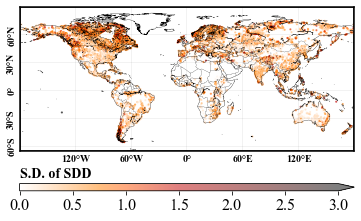

In [35]:
parallels = np.arange(-60,90,30)
meridians = np.arange(-120,121,60.)

trend_map = Basemap(resolution='c', urcrnrlat=90, llcrnrlat=-65, urcrnrlon=180, llcrnrlon=-180,
                 area_thresh=100, lat_0=0, lon_0=0)
x,y = trend_map(lon, lat)
trend_map.drawcoastlines(linewidth=0.3)
trend_map.drawcountries(linewidth=0.2)
trend_map.drawmapboundary(linewidth=1.5)
trend_map.scatter(x, y, c=np.nanstd(tem_sdd,1), marker='o', s=1.5, vmin=0, vmax=3, cmap='gist_heat_r',alpha=0.5)
trend_map.drawparallels(parallels,labels=[True,False,False,False],fontsize=10,weight='bold',rotation=90,linewidth=lines)
trend_map.drawmeridians(meridians,labels=[False,False,False,True],fontsize=10,weight='bold',linewidth=lines)
cb = trend_map.colorbar(location='bottom',extend='max',pad=0.45)
cb.ax.tick_params(labelsize=16)
cb.ax.set_title('S.D. of SDD', fontsize=14, weight='bold',loc='left')
# plt.savefig('./FigS6.png',dpi=1000, bbox_inches='tight')

Text(0.0, 1.0, 'CV of SDD')

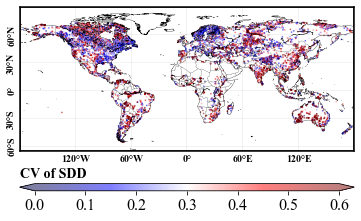

In [36]:
parallels = np.arange(-60,90,30)
meridians = np.arange(-120,121,60.)

cv = np.nanstd(tem_sdd,1)/np.nanmean(tem_sdd,1)

trend_map = Basemap(resolution='c', urcrnrlat=90, llcrnrlat=-65, urcrnrlon=180, llcrnrlon=-180,
                 area_thresh=100, lat_0=0, lon_0=0)
x,y = trend_map(lon, lat)
trend_map.drawcoastlines(linewidth=0.3)
trend_map.drawcountries(linewidth=0.2)
trend_map.drawmapboundary(linewidth=1.5)
trend_map.scatter(x, y, c=cv, marker='o', s=0.5, vmin=0., vmax=0.6, cmap='seismic',alpha=0.5)# seismic_r gist_rainbow gist_heat_r
trend_map.drawparallels(parallels,labels=[True,False,False,False],fontsize=10,weight='bold',rotation=90,linewidth=lines)
trend_map.drawmeridians(meridians,labels=[False,False,False,True],fontsize=10,weight='bold',linewidth=lines)
cb = trend_map.colorbar(location='bottom',extend='both',pad=0.45)
cb.ax.tick_params(labelsize=16)
cb.ax.set_title('CV of SDD', fontsize=14, weight='bold',loc='left')
# plt.savefig('./FigS7.png',dpi=1000, bbox_inches='tight')

In [38]:
# Lon
x_lon = lon
average_lon = np.zeros(shape=(int(np.max(x_lon))+1-int(np.min(x_lon))),)
sdd_dgrn_lon = np.nanmean(tem_sdd,1)

list_lon = np.arange(int(np.min(x_lon)),int(np.max(x_lon))+1)
average_lon = np.zeros(shape=(int(np.max(x_lon))+1-int(np.min(x_lon))),)
n = 0
print('************ LON ************')
for lon1 in range(int(np.min(x_lon)),int(np.max(x_lon))+1):
    save_space = []
    save_lon = []
    for i in range(x_lon.shape[0]):
        if lon1 <= x_lon[i] < lon1+1:
            save_space.append(sdd_dgrn_lon[i])
            save_lon.append(round(x_lon[i],0))
        else:
            pass
    average_lon[n] = np.nanmean(np.array(save_space))
    n += 1
del save_space
# Lat
x_lat = lat
average_lat = np.zeros(shape=(int(np.max(x_lat))+1-int(np.min(x_lat))),)
sdd_dgrn_lat = np.nanmean(tem_sdd,1)
list_lat = np.arange(int(np.min(x_lat)),int(np.max(x_lat))+1)
average_lat = np.zeros(shape=(int(np.max(x_lat))+1-int(np.min(x_lat))),)
m = 0
print('************ LAT ************')
for lat1 in range(int(np.min(x_lat)),int(np.max(x_lat))+1):
    save_space = []
    save_lat = []
    for i in range(x_lat.shape[0]):
        if lat1 <= x_lat[i] < lat1+1:
            save_space.append(sdd_dgrn_lat[i])
            save_lat.append(round(x_lat[i],0))
        else:
            pass
    average_lat[m] = np.nanmean(np.array(save_space))
    m += 1
del save_space

list_lat = np.arange(int(np.min(x_lat)),int(np.max(x_lat))+1)
list_lon = np.arange(int(np.min(x_lon)),int(np.max(x_lon))+1)

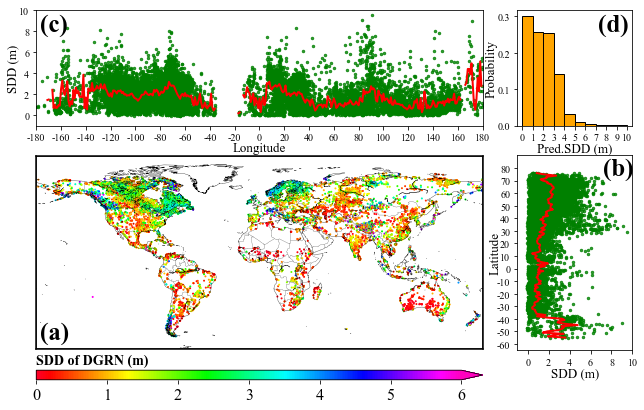

In [40]:
def scatter_hist(x, y, ax, data, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=True)
    ax_histy.tick_params(axis="y", labelleft=True)

    ax_histx.scatter(y, np.nanmean(tem_sdd,1), c='g', marker='o', alpha=0.8, s=6, label='Lake-average')
    ax_histx.set_xlim([-180,180])
    ax_histx.set_xticks([-180,-160,-140,-120,-100,-80,-60,-40,-20,0,20,40,60,80,100,120,140,160,180])
    ax_histx.set_xticklabels([-180,-160,-140,-120,-100,-80,-60,-40,-20,0,20,40,60,80,100,120,140,160,180])
    ax_histx.set_yticks([0,2,4,6,8,10])
    ax_histx.set_yticklabels([0,2,4,6,8,10])
    ax_histx.set_ylim([-1,10])
    ax_histx.set_ylabel('SDD (m)',fontsize=13,labelpad=0.05)
    ax_histx.set_xlabel('Longitude',fontsize=13,labelpad=0.05)
    ax_histx.plot(list_lon, average_lon, 'r-', label='Average per degree', linewidth=2)
    ax_histx.text(-177,8,'(c)',fontsize=25,weight='bold')
    
    ax_histy.scatter(np.nanmean(tem_sdd,1), x, c='g', marker='o', alpha=0.8, s=6, label='Lake-average')
    ax_histy.set_ylim([-65,90])
    ax_histy.set_yticks([-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80])
    ax_histy.set_yticklabels([-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80])
    ax_histy.set_xticks([0,2,4,6,8,10])
    ax_histy.set_xticklabels([0,2,4,6,8,10])
    ax_histy.set_xlim([-1,10])
    ax_histy.set_xlabel('SDD (m)',fontsize=13,labelpad=0.05)
    ax_histy.set_ylabel('Latitude',fontsize=13,labelpad=-5)
    ax_histy.plot(average_lat, list_lat, 'r-', label='Average per degree', linewidth=2)
    ax_histy.text(7.2,74.8,'(b)',fontsize=25,weight='bold')
    
    ax_figd.hist(sdd_dgrn_lat, bins=[0,1,2,3,4,5,6,7,8,9,10], density=True, color='orange',edgecolor='black')
    ax_figd.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
    ax_figd.set_xticklabels([0,1,2,3,4,5,6,7,8,9,10])
    ax_figd.set_xlabel('Pred.SDD (m)',fontsize=13,labelpad=0.05)
    ax_figd.set_ylabel('Probability',fontsize=13,labelpad=0.05)
    ax_figd.text(7.2,0.26,'(d)',fontsize=25,weight='bold')
    
# rect_scatter = [left, bottom, width, height]
rect_histx = [0.125, 0.75, 0.775, 0.2]
rect_histy = [0.96, 0.36, 0.2, 0.338]
rect_figd = [0.96, 0.75, 0.2, 0.2]
# start with a square Figure
fig = plt.figure(figsize=(8, 8))
trend_map = Basemap(resolution='c', urcrnrlat=90, llcrnrlat=-65, urcrnrlon=180, llcrnrlon=-180,
                 area_thresh=100, lat_0=0, lon_0=0)
x,y = trend_map(lon, lat)
trend_map.drawcoastlines(linewidth=0.3)
trend_map.drawcountries(linewidth=0.2)
trend_map.drawmapboundary(linewidth=1.5)
trend_map.scatter(x, y, c=np.nanmean(tem_sdd,1), marker='o', s=1, vmin=0, vmax=6, cmap='gist_rainbow',alpha=1)
plt.text(-177,-57,'(a)',fontsize=25,weight='bold')
cb = trend_map.colorbar(location='bottom',extend='max',pad=0.3)
cb.ax.tick_params(labelsize=16)
cb.ax.set_title('SDD of DGRN (m)', fontsize=14, weight='bold',loc='left')
ax_histx = fig.add_axes(rect_histx)
ax_histy = fig.add_axes(rect_histy)
ax_figd = fig.add_axes(rect_figd)
# use the previously defined function
scatter_hist(lat, lon, trend_map, np.nanmean(tem_sdd,1), ax_histx, ax_histy)
# plt.savefig('./Fig6.png',dpi=1000, bbox_inches='tight')

In [41]:
average_sdd = np.nanmean(tem_sdd,1)
average_sdd[average_sdd<=0] = np.nan
print(np.nanmin(average_sdd[lat >= 70]))
print(np.nanstd(average_sdd[(lat >= 45) & (lat < 70)]))
print(np.nanmax(average_sdd[(lat >= 25) & (lat < 45)]))
print(np.nanstd(average_sdd[(lat >= 0) & (lat < 25)]))
print(np.nanmin(average_sdd[(lat >= -60) & (lat < -40)]))
print(np.nanmax(average_sdd[(lat >= -40) & (lat < 0)]))
print(np.nanmin(average_sdd))
print(np.nanstd(average_sdd))

0.0128653384745121
1.0964398025099995
9.511834212711879
0.8570627612661362
0.005575960235936284
6.690360512052264
0.0004055042351995146
1.2367005587815962


In [42]:
group_2 = []
group_4 = []
group_6 = []
group_8 = []
group_more = []

for y in range(7):
    group_2.append(tem_sdd[:,y][tem_sdd[:,y]<=2].size)
    group_4.append(tem_sdd[:,y][(tem_sdd[:,y]>2) & (tem_sdd[:,y]<=4)].size)
    group_6.append(tem_sdd[:,y][(tem_sdd[:,y]>4) & (tem_sdd[:,y]<=6)].size)
    group_8.append(tem_sdd[:,y][(tem_sdd[:,y]>6) & (tem_sdd[:,y]<=8)].size)
    group_more.append(tem_sdd[:,y][tem_sdd[:,y]>8].size)
del y

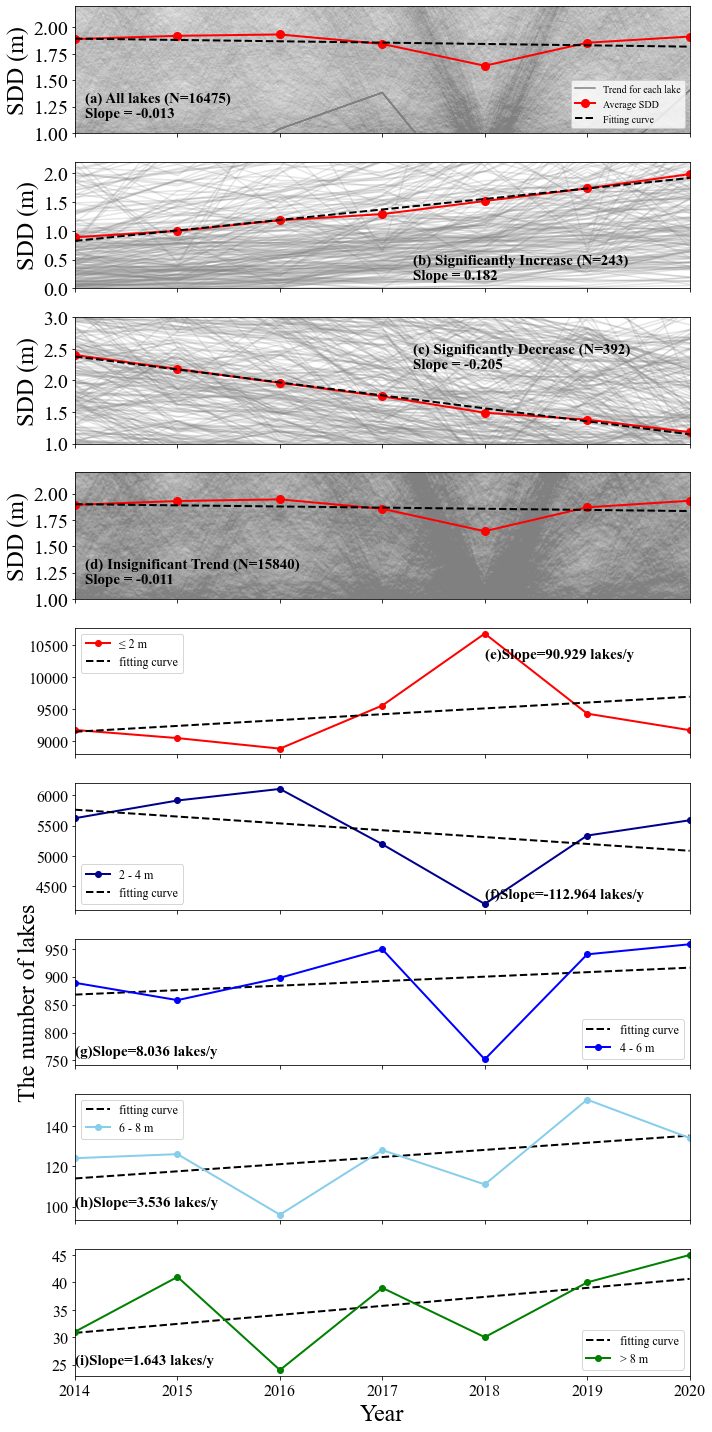

In [43]:
fig = plt.figure(figsize=(10,20))
x = np.arange(2014,2021)

# All
ax1 = fig.add_subplot(911)
a_mean = linregress(x, np.nanmean(tem_sdd,0)).slope
b_mean = linregress(x, np.nanmean(tem_sdd,0)).intercept
for n in range(tem_sdd.shape[0]):
    if n == 0:
        ax1.plot(x, tem_sdd[n,:], c='grey',label='Trend for each lake')
    else:
        ax1.plot(x, tem_sdd[n,:], c='grey',alpha=0.003)
del n
ax1.plot(x, np.nanmean(tem_sdd,0), 'r-', linewidth=2, marker='o', ms=8, label='Average SDD')
ax1.plot(x, a_mean*x+b_mean, 'k--', linewidth=2, label='Fitting curve')
ax1.text(2014.1,1.15,'(a) All lakes (N=%s)\nSlope = %.3f' % (len(fid_lake),a_mean), fontsize=15,weight='bold')
ax1.set_xticklabels([])
ax1.set_ylabel('SDD (m)', fontsize=24)
ax1.legend(loc='lower right',fontsize=10)
plt.yticks(fontsize=20)
plt.ylim([1,2.2])
plt.xlim([2014,2020])

# Increase
ax2 = fig.add_subplot(912)
a_incr = linregress(x, np.nanmean(tem_sdd[fid_incre],0)).slope
b_incr = linregress(x, np.nanmean(tem_sdd[fid_incre],0)).intercept
for n in range(tem_sdd[fid_incre,:].shape[0]):
    ax2.plot(x, tem_sdd[fid_incre,:][n,:], c='grey',alpha=0.2,label='SDD trend for each lake')
del n
ax2.plot(x, np.nanmean(tem_sdd[fid_incre],0), 'r-', linewidth=2, marker='o', ms=8, label='The trend of verage SDD')
ax2.plot(x, a_incr*x+b_incr, 'k--', linewidth=2, label='Fitting curve of average SDD')
ax2.text(2017.3,0.15,'(b) Significantly Increase (N=%s)\nSlope = %.3f' % (len(fid_incre),a_incr),fontsize=15,weight='bold')
ax2.set_xticklabels([])
ax2.set_ylabel('SDD (m)', fontsize=24)
plt.yticks(fontsize=20)
plt.ylim([0.,2.2])
plt.xlim([2014,2020])

# Decrease
ax3 = fig.add_subplot(913)
a_decr = linregress(x, np.nanmean(tem_sdd[fid_decre],0)).slope
b_decr = linregress(x, np.nanmean(tem_sdd[fid_decre],0)).intercept
for n in range(tem_sdd[fid_decre,:].shape[0]):
    ax3.plot(x, tem_sdd[fid_decre,:][n,:], c='grey',alpha=0.2)
del n
ax3.plot(x, np.nanmean(tem_sdd[fid_decre],0), 'r-', linewidth=2, marker='o', ms=8)
ax3.plot(x, a_decr*x+b_decr, 'k--', linewidth=2)
ax3.text(2017.3,2.2,'(c) Significantly Decrease (N=%s)\nSlope = %.3f' % (len(fid_decre),a_decr),fontsize=15,weight='bold')
ax3.set_xticklabels([])
ax3.set_ylabel('SDD (m)', fontsize=24)
plt.yticks(fontsize=20)
plt.ylim([1,3])
plt.xlim([2014,2020])

# Unsig trend
ax4 = fig.add_subplot(914)
a_unsig = linregress(x, np.nanmean(tem_sdd[fid_unsig],0)).slope
b_unsig = linregress(x, np.nanmean(tem_sdd[fid_unsig],0)).intercept
for n in range(tem_sdd[fid_unsig,:].shape[0]):
    ax4.plot(x, tem_sdd[fid_unsig,:][n,:], c='grey',alpha=0.01)
del n
ax4.plot(x, np.nanmean(tem_sdd[fid_unsig,:],0), 'r-', linewidth=2, marker='o', ms=8)
ax4.plot(x, a_unsig*x+b_unsig, 'k--', linewidth=2)
ax4.text(2014.1,1.15,'(d) Insignificant Trend (N=%s)\nSlope = %.3f' % (len(fid_unsig),a_unsig),
         fontsize=15,weight='bold')
ax4.set_xticklabels([])
ax4.set_ylabel('SDD (m)', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim([1,2.2])
plt.xlim([2014,2020])

xx = np.arange(2014,2021)

ax5 = fig.add_subplot(915)
a_1 = linregress(xx, group_2).slope
b_1 = linregress(xx, group_2).intercept
ax5.plot(xx, group_2, label='≤ 2 m', c='r', marker='o', linewidth=2)
ax5.plot(xx, a_1*xx+b_1, 'k--', linewidth=2, label='fitting curve')
ax5.set_xlim([2014,2020])
ax5.set_xticklabels([])
plt.yticks(fontsize=16)
ax5.text(2018,10300,'(e)Slope=%.3f lakes/y' % (a_1),fontsize=15,weight='bold')
plt.legend(loc='upper left', fontsize=12)

ax6 = fig.add_subplot(916)
a_2 = linregress(xx, group_4).slope
b_2 = linregress(xx, group_4).intercept
ax6.plot(xx, group_4, label='2 - 4 m', c='darkblue', marker='o', linewidth=2)
ax6.plot(xx, a_2*xx+b_2, 'k--', linewidth=2, label='fitting curve')
ax6.set_xlim([2014,2020])
ax6.set_xticklabels([])
plt.yticks(fontsize=16)
ax6.text(2018,4300,'(f)Slope=%.3f lakes/y' % (a_2),fontsize=15,weight='bold')
plt.legend(loc='best', fontsize=12)

ax7 = fig.add_subplot(917)
a_3 = linregress(xx, group_6).slope
b_3 = linregress(xx, group_6).intercept
ax7.plot(xx, a_3*xx+b_3, 'k--', linewidth=2, label='fitting curve')
ax7.plot(xx, group_6, label='4 - 6 m', c='b', marker='o', linewidth=2)
ax7.set_xlim([2014,2020])
ax7.set_xticklabels([])
plt.yticks(fontsize=16)
ax7.set_ylabel('The number of lakes', fontsize=24)
ax7.text(2014,760,'(g)Slope=%.3f lakes/y' % (a_3),fontsize=15,weight='bold')
plt.legend(loc='lower right', fontsize=12)

ax8 = fig.add_subplot(918)
a_4 = linregress(xx, group_8).slope
b_4 = linregress(xx, group_8).intercept
ax8.plot(xx, a_4*xx+b_4, 'k--', linewidth=2, label='fitting curve')
ax8.plot(xx, group_8, label='6 - 8 m', c='skyblue', marker='o', linewidth=2)
ax8.set_xlim([2014,2020])
ax8.set_xticklabels([])
plt.yticks(fontsize=16)
ax8.text(2014,100,'(h)Slope=%.3f lakes/y' % (a_4),fontsize=15,weight='bold')
plt.legend(loc='best', fontsize=12)

ax9 = fig.add_subplot(919)
a_5 = linregress(xx, group_more).slope
b_5 = linregress(xx, group_more).intercept
ax9.plot(xx, a_5*xx+b_5, 'k--', linewidth=2, label='fitting curve')
ax9.plot(xx, group_more, label='> 8 m', c='green', marker='o', linewidth=2)
ax9.set_xlim([2014,2020])
plt.yticks(fontsize=16)
ax9.set_xticklabels(xx, fontsize=16)
ax9.set_xlabel('Year',fontsize=24)
ax9.text(2014,25,'(i)Slope=%.3f lakes/y' % (a_5),fontsize=15,weight='bold')
plt.legend(loc='best', fontsize=12)

plt.tight_layout()
# plt.savefig('./Fig9.png',dpi=1000, bbox_inches='tight')
plt.show()

In [44]:
test = []
test_array = np.zeros(shape=(25,))

for lake in range(sdd_2019.shape[0]):
    if sdd_2019[lake] <= 2:
        if sdd_2020[lake] <= 2:
            test_array[0] += 1
        elif sdd_2020[lake] > 2 and sdd_2020[lake] <= 4:
            test_array[1] += 1
        elif sdd_2020[lake] > 4 and sdd_2020[lake] <= 6:
            test_array[2] += 1  
        elif sdd_2020[lake] > 6 and sdd_2020[lake] <= 8:
            test_array[3] += 1
        else:
            test_array[4] += 1
            
    elif sdd_2019[lake] > 2 and sdd_2019[lake] <= 4:
        if sdd_2020[lake] <= 2:
            test_array[5] += 1
        elif sdd_2020[lake] > 2 and sdd_2020[lake] <= 4:
            test_array[6] += 1
        elif sdd_2020[lake] > 4 and sdd_2020[lake] <= 6:
            test_array[7] += 1  
        elif sdd_2020[lake] > 6 and sdd_2020[lake] <= 8:
            test_array[8] += 1
        else:
            test_array[9] += 1
    
    elif sdd_2019[lake] > 4 and sdd_2019[lake] <= 6:
        if sdd_2020[lake] <= 2:
            test_array[10] += 1
        elif sdd_2020[lake] > 2 and sdd_2020[lake] <= 4:
            test_array[11] += 1
        elif sdd_2020[lake] > 4 and sdd_2020[lake] <= 6:
            test_array[12] += 1  
        elif sdd_2020[lake] > 6 and sdd_2020[lake] <= 8:
            test_array[13] += 1
        else:
            test_array[14] += 1
    
    elif sdd_2019[lake] > 6 and sdd_2019[lake] <= 8:
#         print(lake)
        if sdd_2020[lake] <= 2:
            test_array[15] += 1
        elif sdd_2020[lake] > 2 and sdd_2020[lake] <= 4:
            test_array[16] += 1
        elif sdd_2020[lake] > 4 and sdd_2020[lake] <= 6:
            test_array[17] += 1  
        elif sdd_2020[lake] > 6 and sdd_2020[lake] <= 8:
            test_array[18] += 1
        else:
            test_array[19] += 1
            
    else:
        if sdd_2020[lake] <= 2:
            test_array[20] += 1
        elif sdd_2020[lake] > 2 and sdd_2020[lake] <= 4:
            test_array[21] += 1
        elif sdd_2020[lake] > 4 and sdd_2020[lake] <= 6:
            test_array[22] += 1  
        elif sdd_2020[lake] > 6 and sdd_2020[lake] <= 8:
            test_array[23] += 1
        else:
            test_array[24] += 1
print(test_array)

[7842. 1363.   76.   16.  133. 1101. 3484.  472.   29.  248.   81.  452.
  316.   39.   52.   14.   39.   42.   40.   18.  135.  248.   52.   10.
  173.]


In [45]:
df_sangji = pd.DataFrame()
df_sangji['2019'] = ['2019 SDD≤2\n57.24%','2019 SDD≤2\n57.24%','2019 SDD≤2\n57.24%','2019 SDD≤2\n57.24%','2019 SDD≤2\n57.24%',
                    '2019 2<SDD≤4\n32.37%','2019 2<SDD≤4\n32.37%','2019 2<SDD≤4\n32.37%','2019 2<SDD≤4\n32.37%','2019 2<SDD≤4\n32.37%',
                    '2019 4<SDD≤6\n5.71%','2019 4<SDD≤6\n5.71%','2019 4<SDD≤6\n5.71%','2019 4<SDD≤6\n5.71%','2019 4<SDD≤6\n5.71%',
                    '2019 6<SDD≤8\n0.93%','2019 6<SDD≤8\n0.93%','2019 6<SDD≤8\n0.93%','2019 6<SDD≤8\n0.93%','2019 6<SDD≤8\n0.93%',
                    '2019 SDD>8\n3.75%','2019 SDD>8\n3.75%','2019 SDD>8\n3.75%','2019 SDD>8\n3.75%','2019 SDD>8\n3.75%']
df_sangji['2020'] = ['2020 SDD≤2\n55.68%','2020 2<SDD≤4\n33.91%','2020 4<SDD≤6\n5.81%','2020 6<SDD≤8\n0.81%','2020 SDD>8\n3.79%',
                    '2020 SDD≤2\n55.68%','2020 2<SDD≤4\n33.91%','2020 4<SDD≤6\n5.81%','2020 6<SDD≤8\n0.81%','2020 SDD>8\n3.79%',
                    '2020 SDD≤2\n55.68%','2020 2<SDD≤4\n33.91%','2020 4<SDD≤6\n5.81%','2020 6<SDD≤8\n0.81%','2020 SDD>8\n3.79%',
                    '2020 SDD≤2\n55.68%','2020 2<SDD≤4\n33.91%','2020 4<SDD≤6\n5.81%','2020 6<SDD≤8\n0.81%','2020 SDD>8\n3.79%',
                    '2020 SDD≤2\n55.68%','2020 2<SDD≤4\n33.91%','2020 4<SDD≤6\n5.81%','2020 6<SDD≤8\n0.81%','2020 SDD>8\n3.79%']
df_sangji['num'] = list(test_array)
df_sangji

,2019,2020,num
0,2019 SDD≤2\n57.24%,2020 SDD≤2\n55.68%,7842.0
1,2019 SDD≤2\n57.24%,2020 2<SDD≤4\n33.91%,1363.0
2,2019 SDD≤2\n57.24%,2020 4<SDD≤6\n5.81%,76.0
3,2019 SDD≤2\n57.24%,2020 6<SDD≤8\n0.81%,16.0
4,2019 SDD≤2\n57.24%,2020 SDD>8\n3.79%,133.0
5,2019 2<SDD≤4\n32.37%,2020 SDD≤2\n55.68%,1101.0
6,2019 2<SDD≤4\n32.37%,2020 2<SDD≤4\n33.91%,3484.0
7,2019 2<SDD≤4\n32.37%,2020 4<SDD≤6\n5.81%,472.0
8,2019 2<SDD≤4\n32.37%,2020 6<SDD≤8\n0.81%,29.0
9,2019 2<SDD≤4\n32.37%,2020 SDD>8\n3.79%,248.0


In [46]:
from pyecharts.charts import  Sankey
from pyecharts import options as opts
nodes=[]
for i in range(2):
    vales=df_sangji.iloc[:,i].unique()
    for value in vales:
        dic={}
        dic['name']=value
        nodes.append(dic)
print(nodes)
print('\n')
linkes=[]
for i in df_sangji.values:
    dic={}
    dic['source']=i[0]
    dic['target']=i[1]
    dic['value']=i[2]
    linkes.append(dic)
linkes
pic = (
    Sankey()
    .add('', 
         nodes,    
         linkes,  
         linestyle_opt=opts.LineStyleOpts(opacity = 0.3, curve = 0.5, color = "source"),
         label_opts=opts.LabelOpts(position="right",font_size=14),
         node_gap = 30,
    )
    .set_global_opts(title_opts=opts.TitleOpts(title = '(a) Changes of SDD'))
)

# pic.render('./Fig12a.html')

[{'name': '2019 SDD≤2\n57.24%'}, {'name': '2019 2<SDD≤4\n32.37%'}, {'name': '2019 4<SDD≤6\n5.71%'}, {'name': '2019 6<SDD≤8\n0.93%'}, {'name': '2019 SDD>8\n3.75%'}, {'name': '2020 SDD≤2\n55.68%'}, {'name': '2020 2<SDD≤4\n33.91%'}, {'name': '2020 4<SDD≤6\n5.81%'}, {'name': '2020 6<SDD≤8\n0.81%'}, {'name': '2020 SDD>8\n3.79%'}]




In [47]:
ana_sdd = np.zeros_like(tem_sdd)
for t in range(7):
    ana_sdd[:,t] = tem_sdd[:,t] - np.nanmean(tem_sdd, 1)
del t

# Calculate Sen's slope and pvalue
xx = np.arange(2014,2021)
sen_slope = np.zeros(shape=(ana_sdd.shape[0]))
mk_pvalue = np.zeros_like(sen_slope)
for lake in range(ana_sdd.shape[0]):
    # Mann-Kendall Trend Analysis
    sen_slope[lake,] = theilslopes(ana_sdd[lake,:], xx, alpha=0.95)[0]
    mk_pvalue[lake,] = kendalltau(xx, ana_sdd[lake,:])[1]
del lake

In [48]:
ana_2019 = ana_sdd[:,5]
ana_2020 = ana_sdd[:,6]

test = []
test_array = np.zeros(shape=(25,))

for lake in range(sdd_2019.shape[0]):
    if ana_2019[lake] <= 0:
        if ana_2020[lake] <= 0:
            test_array[0] += 1
        elif ana_2020[lake] > 0 and ana_2020[lake] <= 0.5:
            test_array[1] += 1
        elif ana_2020[lake] > 0.5 and ana_2020[lake] <= 1:
            test_array[2] += 1  
        elif ana_2020[lake] > 1 and ana_2020[lake] <= 2:
            test_array[3] += 1
        else:
            test_array[4] += 1
            
    elif ana_2019[lake] > 0 and ana_2019[lake] <= 0.5:
        if ana_2020[lake] <= 0:
            test_array[5] += 1
        elif ana_2020[lake] > 0 and ana_2020[lake] <= 0.5:
            test_array[6] += 1
        elif ana_2020[lake] > 0.5 and ana_2020[lake] <= 1:
            test_array[7] += 1  
        elif ana_2020[lake] > 1 and ana_2020[lake] <= 2:
            test_array[8] += 1
        else:
            test_array[9] += 1
    
    elif ana_2019[lake] > 0.5 and ana_2019[lake] <= 1:
        if ana_2020[lake] <= 0:
            test_array[10] += 1
        elif ana_2020[lake] > 0 and ana_2020[lake] <= 0.5:
            test_array[11] += 1
        elif ana_2020[lake] > 0.5 and ana_2020[lake] <= 1:
            test_array[12] += 1  
        elif ana_2020[lake] > 1 and ana_2020[lake] <= 2:
            test_array[13] += 1
        else:
            test_array[14] += 1
    
    elif ana_2019[lake] > 1 and ana_2019[lake] <= 2:
#         print(lake)
        if ana_2020[lake] <= 0:
            test_array[15] += 1
        elif ana_2020[lake] > 0 and ana_2020[lake] <= 0.5:
            test_array[16] += 1
        elif ana_2020[lake] > 0.5 and ana_2020[lake] <= 1:
            test_array[17] += 1  
        elif ana_2020[lake] > 1 and ana_2020[lake] <= 2:
            test_array[18] += 1
        else:
            test_array[19] += 1
            
    else:
        if ana_2020[lake] <= 0:
            test_array[20] += 1
        elif ana_2020[lake] > 0 and ana_2020[lake] <= 0.5:
            test_array[21] += 1
        elif ana_2020[lake] > 0.5 and ana_2020[lake] <= 1:
            test_array[22] += 1  
        elif ana_2020[lake] > 1 and ana_2020[lake] <= 2:
            test_array[23] += 1
        else:
            test_array[24] += 1
print(test_array)

df_sangji = pd.DataFrame()
df_sangji['2019'] = ['2019 Anomaly≤0\n53.10%','2019 Anomaly≤0\n53.10%','2019 Anomaly≤0\n53.10%','2019 Anomaly≤0\n53.10%','2019 Anomaly≤0\n53.10%',
                    '2019 0<Anomaly≤0.5\n29.98%','2019 0<Anomaly≤0.5\n29.98%','2019 0<Anomaly≤0.5\n29.98%','2019 0<Anomaly≤0.5\n29.98%','2019 0<Anomaly≤0.5\n29.98%',
                    '2019 0.5<Anomaly≤1\n8.09%','2019 0.5<Anomaly≤1\n8.09%','2019 0.5<Anomaly≤1\n8.09%','2019 0.5<Anomaly≤1\n8.09%','2019 0.5<Anomaly≤1\n8.09%',
                    '2019 1<Anomaly≤2\n4.27%','2019 1<Anomaly≤2\n4.27%','2019 1<Anomaly≤2\n4.27%','2019 1<Anomaly≤2\n4.27%','2019 1<Anomaly≤2\n4.27%',
                    '2019 Anomaly>2\n4.56%','2019 Anomaly>2\n4.56%','2019 Anomaly>2\n4.56%','2019 Anomaly>2\n4.56%','2019 Anomaly>2\n4.56%']
df_sangji['2020'] = ['2020 Anomaly≤0\n46.17%','2020 0<Anomaly≤0.5\n32.74%','2020 0.5<Anomaly≤1\n10.82%','2020 1<Anomaly≤2\n5.51%','2020 Anomaly>2\n4.77%',
                    '2020 Anomaly≤0\n46.17%','2020 0<Anomaly≤0.5\n32.74%','2020 0.5<Anomaly≤1\n10.82%','2020 1<Anomaly≤2\n5.51%','2020 Anomaly>2\n4.77%',
                    '2020 Anomaly≤0\n46.17%','2020 0<Anomaly≤0.5\n32.74%','2020 0.5<Anomaly≤1\n10.82%','2020 1<Anomaly≤2\n5.51%','2020 Anomaly>2\n4.77%',
                    '2020 Anomaly≤0\n46.17%','2020 0<Anomaly≤0.5\n32.74%','2020 0.5<Anomaly≤1\n10.82%','2020 1<Anomaly≤2\n5.51%','2020 Anomaly>2\n4.77%',
                    '2020 Anomaly≤0\n46.17%','2020 0<Anomaly≤0.5\n32.74%','2020 0.5<Anomaly≤1\n10.82%','2020 1<Anomaly≤2\n5.51%','2020 Anomaly>2\n4.77%']
df_sangji['num'] = list(test_array)
print(df_sangji)

from pyecharts.charts import  Sankey
from pyecharts import options as opts
nodes=[]
for i in range(2):
    vales=df_sangji.iloc[:,i].unique()
    for value in vales:
        dic={}
        dic['name']=value
        nodes.append(dic)
print(nodes)
print('\n')
linkes=[]
for i in df_sangji.values:
    dic={}
    dic['source']=i[0]
    dic['target']=i[1]
    dic['value']=i[2]
    linkes.append(dic)
linkes
pic = (
    Sankey()
    .add('', 
         nodes, 
         linkes, 
         linestyle_opt=opts.LineStyleOpts(opacity = 0.3, curve = 0.5, color = "source"),
         label_opts=opts.LabelOpts(position="right"),
         node_gap = 30,
    )
    .set_global_opts(title_opts=opts.TitleOpts(title = '(b) Anomaly',))
)

# pic.render('./Fig12b.html')

[3947. 2904.  967.  542.  388. 2348. 1832.  459.  165.  135.  647.  360.
  212.   67.   47.  387.  141.   68.   75.   33.  277.  157.   76.   58.
  183.]
                          2019                        2020     num
0       2019 Anomaly≤0\n53.10%      2020 Anomaly≤0\n46.17%  3947.0
1       2019 Anomaly≤0\n53.10%  2020 0<Anomaly≤0.5\n32.74%  2904.0
2       2019 Anomaly≤0\n53.10%  2020 0.5<Anomaly≤1\n10.82%   967.0
3       2019 Anomaly≤0\n53.10%     2020 1<Anomaly≤2\n5.51%   542.0
4       2019 Anomaly≤0\n53.10%       2020 Anomaly>2\n4.77%   388.0
5   2019 0<Anomaly≤0.5\n29.98%      2020 Anomaly≤0\n46.17%  2348.0
6   2019 0<Anomaly≤0.5\n29.98%  2020 0<Anomaly≤0.5\n32.74%  1832.0
7   2019 0<Anomaly≤0.5\n29.98%  2020 0.5<Anomaly≤1\n10.82%   459.0
8   2019 0<Anomaly≤0.5\n29.98%     2020 1<Anomaly≤2\n5.51%   165.0
9   2019 0<Anomaly≤0.5\n29.98%       2020 Anomaly>2\n4.77%   135.0
10   2019 0.5<Anomaly≤1\n8.09%      2020 Anomaly≤0\n46.17%   647.0
11   2019 0.5<Anomaly≤1\n8.09%  2020 0<Ano

In [ ]:
df_sdd = pd.read_csv('/Users/yuanhe/Documents/icloud_share/13_machine_deep_learning/02_SDD结果汇总20210601/代码/Code_summary(代码总结)/data/lake_para_SDD_v6-10km2-new.csv')
depth_all = df_sdd['Depth'].values

In [ ]:
# Lon
x_lon = df_sdd['Long'].values
average_lon = np.zeros(shape=(int(np.max(x_lon))+1-int(np.min(x_lon))),)
sdd_dgrn_lon = depth_all

list_lon = np.arange(int(np.min(x_lon)),int(np.max(x_lon))+1)
average_lon = np.zeros(shape=(int(np.max(x_lon))+1-int(np.min(x_lon))),)
n = 0
print('************ LON ************')
for lon1 in range(int(np.min(x_lon)),int(np.max(x_lon))+1):
    save_space = []
    save_lon = []
    for i in range(x_lon.shape[0]):
        if lon1 <= x_lon[i] < lon1+1:
            save_space.append(sdd_dgrn_lon[i])
            save_lon.append(round(x_lon[i],0))
        else:
            pass
    average_lon[n] = np.nanmean(np.array(save_space))
    n += 1
del save_space
# Lat
x_lat = df_sdd['Lat'].values
average_lat = np.zeros(shape=(int(np.max(x_lat))+1-int(np.min(x_lat))),)
sdd_dgrn_lat = depth_all
list_lat = np.arange(int(np.min(x_lat)),int(np.max(x_lat))+1)
average_lat = np.zeros(shape=(int(np.max(x_lat))+1-int(np.min(x_lat))),)
m = 0
print('************ LAT ************')
for lat1 in range(int(np.min(x_lat)),int(np.max(x_lat))+1):
    save_space = []
    save_lat = []
    for i in range(x_lat.shape[0]):
        if lat1 <= x_lat[i] < lat1+1:
            save_space.append(sdd_dgrn_lat[i])
            save_lat.append(round(x_lat[i],0))
        else:
            pass
    average_lat[m] = np.nanmean(np.array(save_space))
    m += 1
del save_space

list_lat = np.arange(int(np.min(x_lat)),int(np.max(x_lat))+1)
list_lon = np.arange(int(np.min(x_lon)),int(np.max(x_lon))+1)
def scatter_hist(x, y, ax, data, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=True)
    ax_histy.tick_params(axis="y", labelleft=True)

    ax_histx.scatter(y, data, c='g', marker='o', alpha=0.8, s=6, label='Lake-average')
    ax_histx.set_xlim([-180,180])
    ax_histx.set_xticks([-180,-160,-140,-120,-100,-80,-60,-40,-20,0,20,40,60,80,100,120,140,160,180])
    ax_histx.set_xticklabels([-180,-160,-140,-120,-100,-80,-60,-40,-20,0,20,40,60,80,100,120,140,160,180])
    ax_histx.set_yticks([0,10,20,30,40,50,60])
    ax_histx.set_yticklabels([0,10,20,30,40,50,60])
    ax_histx.set_ylim([-1,60])
    ax_histx.set_ylabel('Depth (m)',fontsize=13,labelpad=0.05)
    ax_histx.set_xlabel('Longitude',fontsize=13,labelpad=0.05)
    ax_histx.plot(list_lon, average_lon, 'r-', label='Average per degree', linewidth=2)
    ax_histx.text(-177,8,'(c)',fontsize=25,weight='bold')
    
    ax_histy.scatter(data, x, c='g', marker='o', alpha=0.8, s=6, label='Lake-average')
    ax_histy.set_ylim([-65,90])
    ax_histy.set_yticks([-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80])
    ax_histy.set_yticklabels([-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80])
    ax_histy.set_xticks([0,10,20,30,40,50,60])
    ax_histy.set_xticklabels([0,10,20,30,40,50,60])
    ax_histy.set_xlim([-1,60])
    ax_histy.set_xlabel('Depth (m)',fontsize=13,labelpad=0.05)
    ax_histy.set_ylabel('Latitude',fontsize=13,labelpad=-5)
    ax_histy.plot(average_lat, list_lat, 'r-', label='Average per degree', linewidth=2)
    ax_histy.text(35.,74.,'(b)',fontsize=25,weight='bold')
    
    ax_figd.hist(sdd_dgrn_lat, bins=[0,10,20,30,40,50,60,], density=True, color='orange',edgecolor='black')
    ax_figd.set_xticks([0,10,20,30,40,50,60])
    ax_figd.set_xticklabels([0,10,20,30,40,50,60])
    ax_figd.set_yticks(np.arange(0,0.08,0.02))
    ax_figd.set_yticklabels(np.arange(0,8,2))
    ax_figd.set_xlabel('Depth (m)',fontsize=13,labelpad=0.05)
    ax_figd.set_ylabel('Probability',fontsize=13,labelpad=0.005)
    ax_figd.text(40.,0.05,'(d)',fontsize=25,weight='bold')
    
# rect_scatter = [left, bottom, width, height]
rect_histx = [0.125, 0.75, 0.775, 0.2]
rect_histy = [0.96, 0.36, 0.2, 0.338]
rect_figd = [0.96, 0.75, 0.2, 0.2]
# start with a square Figure
fig = plt.figure(figsize=(8, 8))
trend_map = Basemap(resolution='c', urcrnrlat=90, llcrnrlat=-65, urcrnrlon=180, llcrnrlon=-180,
                 area_thresh=100, lat_0=0, lon_0=0)
x,y = trend_map(x_lon, x_lat)
trend_map.drawcoastlines(linewidth=0.3)
trend_map.drawcountries(linewidth=0.2)
trend_map.drawmapboundary(linewidth=1.5)
trend_map.scatter(x, y, c=depth_all, marker='o', s=1, vmin=0, vmax=25, cmap='gist_rainbow',alpha=0.8)
trend_map.drawparallels(parallels,labels=[True,False,False,False],fontsize=12,weight='bold',rotation=90,linewidth=0.1)
trend_map.drawmeridians(meridians,labels=[False,False,False,True],fontsize=12,weight='bold',linewidth=0.1)
plt.text(-177,-57,'(a)',fontsize=25,weight='bold')
cb = trend_map.colorbar(location='bottom',extend='max',pad=0.45)
cb.ax.tick_params(labelsize=16)
cb.ax.set_title('Lake-specific depth (m)', fontsize=14, weight='bold',loc='left')
ax_histx = fig.add_axes(rect_histx)
ax_histy = fig.add_axes(rect_histy)
ax_figd = fig.add_axes(rect_figd)
# use the previously defined function
scatter_hist(x_lat, x_lon, trend_map, depth_all, ax_histx, ax_histy)
# plt.savefig('./results_figure2/Fig8.png',dpi=1000, bbox_inches='tight')
plt.show()
